In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

train = pd.read_csv('./data/train_data.csv')
test = pd.read_csv('./data/test_data.csv')

In [4]:
# Vamos a definir los datos de entrenamiento
X = train.drop(['mineralType', 'id'], axis=1)
y = train['mineralType']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   climaticZone                         12621 non-null  int64  
 1   planetSection                        12621 non-null  object 
 2   temperatureSecondHalfPlanetRotation  12621 non-null  float64
 3   temperatureFirstHalfPlanetRotation   12621 non-null  float64
 4   mineralDensity                       12621 non-null  float64
 5   geoZone                              12621 non-null  int64  
 6   longitude                            12621 non-null  float64
 7   rockSize                             12621 non-null  int64  
 8   waterStreamDistanceY                 12621 non-null  float64
 9   cover                                12621 non-null  int64  
 10  magmaConcentrationDistance           12621 non-null  object 
 11  waterStreamDistanceX        

In [6]:
X['planetSection'] = X['planetSection'].astype('category')
X['geoZone'] = X['geoZone'].astype('category')
X['rockSize'] = X['rockSize'].astype('category')
X['cover'] = X['cover'].astype('category')
X['magmaConcentrationDistance'] = X['magmaConcentrationDistance'].astype('category')

In [7]:
import autosklearn.classification
from autosklearn.metrics import accuracy

cls = autosklearn.classification.AutoSklearnClassifier(n_jobs=-1, metric=accuracy)
cls.fit(X, y)

/home/acampillos/.pyenv/versions/3.7.13/envs/edrvass/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40349 instead
  f"Port {expected} is already in use.\n"


[WARNING] [2022-04-28 17:05:38,482:Client-AutoML(1):a9045102-c704-11ec-8f31-1314a69f1795] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (3599.669743)
[WARNING] [2022-04-28 17:05:38,482:Client-AutoML(1):a9045102-c704-11ec-8f31-1314a69f1795] Capping the per_run_time_limit to 1799.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(metric=accuracy, n_jobs=-1, per_run_time_limit=8640)

In [9]:
cls.sprint_statistics()

'auto-sklearn results:\n  Dataset name: a9045102-c704-11ec-8f31-1314a69f1795\n  Metric: accuracy\n  Best validation score: 0.754862\n  Number of target algorithm runs: 667\n  Number of successful target algorithm runs: 618\n  Number of crashed target algorithm runs: 12\n  Number of target algorithms that exceeded the time limit: 28\n  Number of target algorithms that exceeded the memory limit: 9\n'

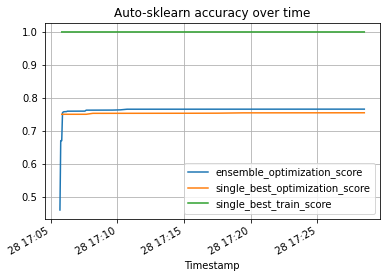

In [10]:
import matplotlib.pyplot as plt

cls.performance_over_time_.plot(
        x='Timestamp',
        kind='line',
        legend=True,
        title='Auto-sklearn accuracy over time',
        grid=True,
    )
plt.show()

In [17]:
cls.show_models()

{128: {'model_id': 128,
  'rank': 1,
  'cost': 0.243937575030012,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f710ca6b150>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f7174e1f450>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f7174e52dd0>,
  'sklearn_classifier': RandomForestClassifier(bootstrap=False, max_features=26, min_samples_split=4,
                         n_estimators=512, n_jobs=1, random_state=1,
                         warm_start=True)},
 136: {'model_id': 136,
  'rank': 2,
  'cost': 0.24585834333733492,
  'ensemble_weight': 0.1,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f70d5e4cb10>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'fea

In [18]:
cls.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
128,1,0.02,random_forest,0.243938,101.846408
136,2,0.10,random_forest,0.245858,43.341316
132,3,0.02,random_forest,0.246098,21.608883
143,4,0.02,random_forest,0.246339,37.410600
96,5,0.02,random_forest,0.247779,75.662097
141,6,0.02,random_forest,0.247779,46.524030
167,7,0.06,random_forest,0.248259,31.879905
124,8,0.02,random_forest,0.248980,54.822742
131,9,0.02,random_forest,0.249220,49.572663


In [11]:
import pickle

# save model
with open('./models/autosklearn.pkl', 'wb') as f:
    pickle.dump(cls, f)

In [1]:
# import pickle

# # load model and calculate accuracy
# with open('../models/autosklearn.pkl', 'rb') as f:
#     cls = pickle.load(f)